# **FIRIN VERİLERİ TEMİZLEME** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dosyasını oku
df = pd.read_excel("orijinal_veri/Fırın Verileri[18].xlsx")

In [3]:
# veri boyut
df.shape

(38792, 58)

In [4]:
# ilk 5 satır
df.head()

,SAAT,TARİH,PRG,GİRİŞ ISI,ÖN ISITMA SET ISI,ÖN ISITMA ISI,ÖN ISITMA GÜÇ %,ÖN ISITMA AMP.,CEH.1 ÜST1 SET ISI,CEH.1 ÜST1 ISI,...,CEH.3 ALT2 SET ISI,CEH.3 ALT2 ISI,CEH.3 ALT2 GÜÇ %,CEH.3 ALT2 AMP.,SOĞUTMA1 ISI,SOĞUTMA2 ISI,SOĞUTMA3 ISI,RULO FREKANS Hz,GİRİŞ PER.FAN Hz,ÇIKIŞ PER.FAN Hz
0,00:00:00,2024-11-01,1,1081,550,518,75,650,680,699,...,845,850,16,222,656,515,363,3150,2750,0
1,00:03:00,2024-11-01,1,1013,550,517,75,649,680,689,...,845,840,56,393,659,522,368,3150,2750,0
2,00:04:00,2024-11-01,1,1178,550,517,75,644,680,691,...,845,846,67,520,660,524,370,3150,2750,0
3,00:06:00,2024-11-01,1,1075,550,519,75,642,680,699,...,845,850,11,192,664,529,373,3150,2750,0
4,00:08:00,2024-11-01,1,1166,550,519,75,649,680,693,...,845,840,30,252,666,532,377,3150,2750,0


In [5]:
df.columns # sütun adları 

Index(['SAAT', 'TARİH', 'PRG', 'GİRİŞ ISI', 'ÖN ISITMA SET ISI',
       'ÖN ISITMA ISI', 'ÖN ISITMA GÜÇ %', 'ÖN ISITMA AMP.',
       'CEH.1 ÜST1 SET ISI', 'CEH.1 ÜST1 ISI', 'CEH.1 ÜST1 GÜÇ %',
       'CEH.1 ÜST1 AMP.', 'CEH.1 ÜST2 SET ISI', 'CEH.1 ÜST2  ISI',
       'CEH.1 ÜST2 GÜÇ %', 'CEH.1 ÜST2 AMP.', 'CEH.1 ALT1 SET ISI',
       'CEH.1 ALT1 ISI', 'CEH.1 ALT1 GÜÇ %', 'CEH.1 ALT1 AMP.',
       'CEH.2 ÜST1 SET ISI', 'CEH.2 ÜST1 ISI', 'CEH.2 ÜST1 GÜÇ %',
       'CEH.2 ÜST1 AMP.', 'CEH.2 ÜST2 SET ISI', 'CEH.2 ÜST2 ISI',
       'CEH.2 ÜST2 GÜÇ %', 'CEH.2 ÜST2 AMP.', 'CEH.2 ALT1 SET ISI',
       'CEH.2 ALT1 ISI', 'CEH.2 ALT1 GÜÇ %', 'CEH.2 ALT1 AMP.',
       'CEH.2 ALT2 SET ISI', 'CEH.2 ALT2 ISI', 'CEH.2 ALT2 GÜÇ %',
       'CEH.2 ALT2 AMP.', 'CEH.3 ÜST1 SET ISI', 'CEH.3 ÜST1 ISI',
       'CEH.3 ÜST1 GÜÇ %', 'CEH.3 ÜST1 AMP.', 'CEH.3 ÜST2 SET ISI',
       'CEH.3 ÜST2 ISI', 'CEH.3 ÜST2 GÜÇ %', 'CEH.3 ÜST2 AMP.',
       'CEH.3 ALT1 SET ISI', 'CEH.3 ALT1 ISI', 'CEH.3 ALT1 GÜÇ %',
       'CEH

## Sütun Adları Düzenleme

In [6]:
# Sütun adlarını düzenleme: boşlukları alt çizgiye çevir, turkce özel karakter kullanma

# Türkçe karakterler
char_map = str.maketrans({
    "Ç": "C", "ç": "c",
    "Ğ": "G", "ğ": "g",
    "İ": "I", "ı": "i",
    "Ö": "O", "ö": "o",
    "Ş": "S", "ş": "s",
    "Ü": "U", "ü": "u"
})

def temizle_kolon_adlari(columns):
    return [
        col.translate(char_map)  # Türkçe karakterleri değiştir
           .lower()              # Küçük harf yap
           .replace(" ", "_")    # Boşlukları "_" yap
        for col in columns
    ]

df.columns = temizle_kolon_adlari(df.columns)

# sütun adları
print(df.columns)


Index(['saat', 'tarih', 'prg', 'giris_isi', 'on_isitma_set_isi',
       'on_isitma_isi', 'on_isitma_guc_%', 'on_isitma_amp.',
       'ceh.1_ust1_set_isi', 'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%',
       'ceh.1_ust1_amp.', 'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi',
       'ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi',
       'ceh.1_alt1_isi', 'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.',
       'ceh.2_ust1_set_isi', 'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%',
       'ceh.2_ust1_amp.', 'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi',
       'ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi',
       'ceh.2_alt1_isi', 'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.',
       'ceh.2_alt2_set_isi', 'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%',
       'ceh.2_alt2_amp.', 'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi',
       'ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi',
       'ceh.3_ust2_isi', 'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.',
       'ceh.3_alt1_set_isi', 'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%',
       'ceh

In [7]:
df.head()

,saat,tarih,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,...,ceh.3_alt2_set_isi,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz
0,00:00:00,2024-11-01,1,1081,550,518,75,650,680,699,...,845,850,16,222,656,515,363,3150,2750,0
1,00:03:00,2024-11-01,1,1013,550,517,75,649,680,689,...,845,840,56,393,659,522,368,3150,2750,0
2,00:04:00,2024-11-01,1,1178,550,517,75,644,680,691,...,845,846,67,520,660,524,370,3150,2750,0
3,00:06:00,2024-11-01,1,1075,550,519,75,642,680,699,...,845,850,11,192,664,529,373,3150,2750,0
4,00:08:00,2024-11-01,1,1166,550,519,75,649,680,693,...,845,840,30,252,666,532,377,3150,2750,0


In [8]:
# Veri türleri
df.dtypes

saat                          object
tarih                 datetime64[ns]
prg                            int64
giris_isi                      int64
on_isitma_set_isi              int64
on_isitma_isi                  int64
on_isitma_guc_%                int64
on_isitma_amp.                 int64
ceh.1_ust1_set_isi             int64
ceh.1_ust1_isi                 int64
ceh.1_ust1_guc_%               int64
ceh.1_ust1_amp.                int64
ceh.1_ust2_set_isi             int64
ceh.1_ust2__isi                int64
ceh.1_ust2_guc_%               int64
ceh.1_ust2_amp.                int64
ceh.1_alt1_set_isi             int64
ceh.1_alt1_isi                 int64
ceh.1_alt1_guc_%               int64
ceh.1_alt1_amp.                int64
ceh.2_ust1_set_isi             int64
ceh.2_ust1_isi                 int64
ceh.2_ust1_guc_%               int64
ceh.2_ust1_amp.                int64
ceh.2_ust2_set_isi             int64
ceh.2_ust2_isi                 int64
ceh.2_ust2_guc_%               int64
c

In [9]:
# Tarih ve saat sütunlarını birleştirerek datetime sütunu oluştur
df["datetime"] = pd.to_datetime(df["tarih"].astype(str) + " " + df["saat"].astype(str), errors="coerce")

In [10]:
df.head(2)

,saat,tarih,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,...,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,datetime
0,00:00:00,2024-11-01,1,1081,550,518,75,650,680,699,...,850,16,222,656,515,363,3150,2750,0,2024-11-01 00:00:00
1,00:03:00,2024-11-01,1,1013,550,517,75,649,680,689,...,840,56,393,659,522,368,3150,2750,0,2024-11-01 00:03:00


In [11]:
# Eksik veri kontrolü: hangi sütunda kaç tane eksik var?
df.isnull().sum().sort_values(ascending=False)

saat                  0
ceh.3_alt1_set_isi    0
ceh.2_alt2_set_isi    0
ceh.2_alt2_isi        0
ceh.2_alt2_guc_%      0
ceh.2_alt2_amp.       0
ceh.3_ust1_set_isi    0
ceh.3_ust1_isi        0
ceh.3_ust1_guc_%      0
ceh.3_ust1_amp.       0
ceh.3_ust2_set_isi    0
ceh.3_ust2_isi        0
ceh.3_ust2_guc_%      0
ceh.3_ust2_amp.       0
ceh.3_alt1_isi        0
ceh.2_alt1_guc_%      0
ceh.3_alt1_guc_%      0
ceh.3_alt1_amp.       0
ceh.3_alt2_set_isi    0
ceh.3_alt2_isi        0
ceh.3_alt2_guc_%      0
ceh.3_alt2_amp.       0
sogutma1_isi          0
sogutma2_isi          0
sogutma3_isi          0
rulo_frekans_hz       0
giris_per.fan_hz      0
cikis_per.fan_hz      0
ceh.2_alt1_amp.       0
ceh.2_alt1_isi        0
tarih                 0
ceh.1_ust2_guc_%      0
prg                   0
giris_isi             0
on_isitma_set_isi     0
on_isitma_isi         0
on_isitma_guc_%       0
on_isitma_amp.        0
ceh.1_ust1_set_isi    0
ceh.1_ust1_isi        0
ceh.1_ust1_guc_%      0
ceh.1_ust1_amp. 

## Dakika'da Bir Veri Çekilmesi Sağlandı 

In [12]:

# Aynı dakikada birden fazla veri varsa, bu verilerin ikiliği analizde karışıklık yaratabilir.

# saat sütununu string'e çevir
df["saat"] = df["saat"].astype(str)

# ilk 5 karakteri al (HH:MM formatı)
df["saat_dakika"] = df["saat"].str.slice(0, 5)

# tarih + saat_dakika ile grup oluştur, sadece ilk kaydı al
df_unique = df.groupby(["tarih", "saat_dakika"]).first().reset_index()

print(f"Orijinal veri sayısı: {len(df)}")
print(f"Tekilleştirilmiş veri sayısı: {len(df_unique)}")
df = df_unique


Orijinal veri sayısı: 38792
Tekilleştirilmiş veri sayısı: 38472


In [13]:
df.shape

(38472, 60)

In [14]:
df.head()

,tarih,saat_dakika,saat,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,...,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,datetime
0,2024-11-01,00:00,00:00:00,1,1081,550,518,75,650,680,...,850,16,222,656,515,363,3150,2750,0,2024-11-01 00:00:00
1,2024-11-01,00:03,00:03:00,1,1013,550,517,75,649,680,...,840,56,393,659,522,368,3150,2750,0,2024-11-01 00:03:00
2,2024-11-01,00:04,00:04:00,1,1178,550,517,75,644,680,...,846,67,520,660,524,370,3150,2750,0,2024-11-01 00:04:00
3,2024-11-01,00:06,00:06:00,1,1075,550,519,75,642,680,...,850,11,192,664,529,373,3150,2750,0,2024-11-01 00:06:00
4,2024-11-01,00:08,00:08:00,1,1166,550,519,75,649,680,...,840,30,252,666,532,377,3150,2750,0,2024-11-01 00:08:00


# Eksik Zaman Aralıkları ve Temizlik

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_daily_hourly_heatmap(df, datetime_column="datetime"):
    """
    Belirtilen datetime sütununa göre günlük ve saatlik veri yoğunluğu heatmap'i çizer.
    
    Parametreler:
    - df: pandas DataFrame
    - datetime_column: datetime tipinde olması gereken sütun adı
    """
    df = df.copy()

    # 1. Zaman sütunu datetime tipine çevrilir
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # 2. Gün ve saat sütunlarını oluştur
    df["Tarih"] = df[datetime_column].dt.date
    df["Saat"] = df[datetime_column].dt.hour

    # 3. Pivot tablo: Gün x Saat → Kayıt Sayısı
    heatmap_df = df.groupby(["Tarih", "Saat"]).size().unstack(fill_value=0)

    # 4. Görselleştirme
    plt.figure(figsize=(14, len(heatmap_df) * 0.4 + 3))
    sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu",
                linewidths=0.5, linecolor='gray',
                cbar_kws={'label': 'Veri Sayısı'})
    plt.title("Günlük ve Saatlik Veri Sayısı Heatmap", fontsize=14)
    plt.xlabel("Saat")
    plt.ylabel("Tarih")
    plt.tight_layout()
    plt.show()


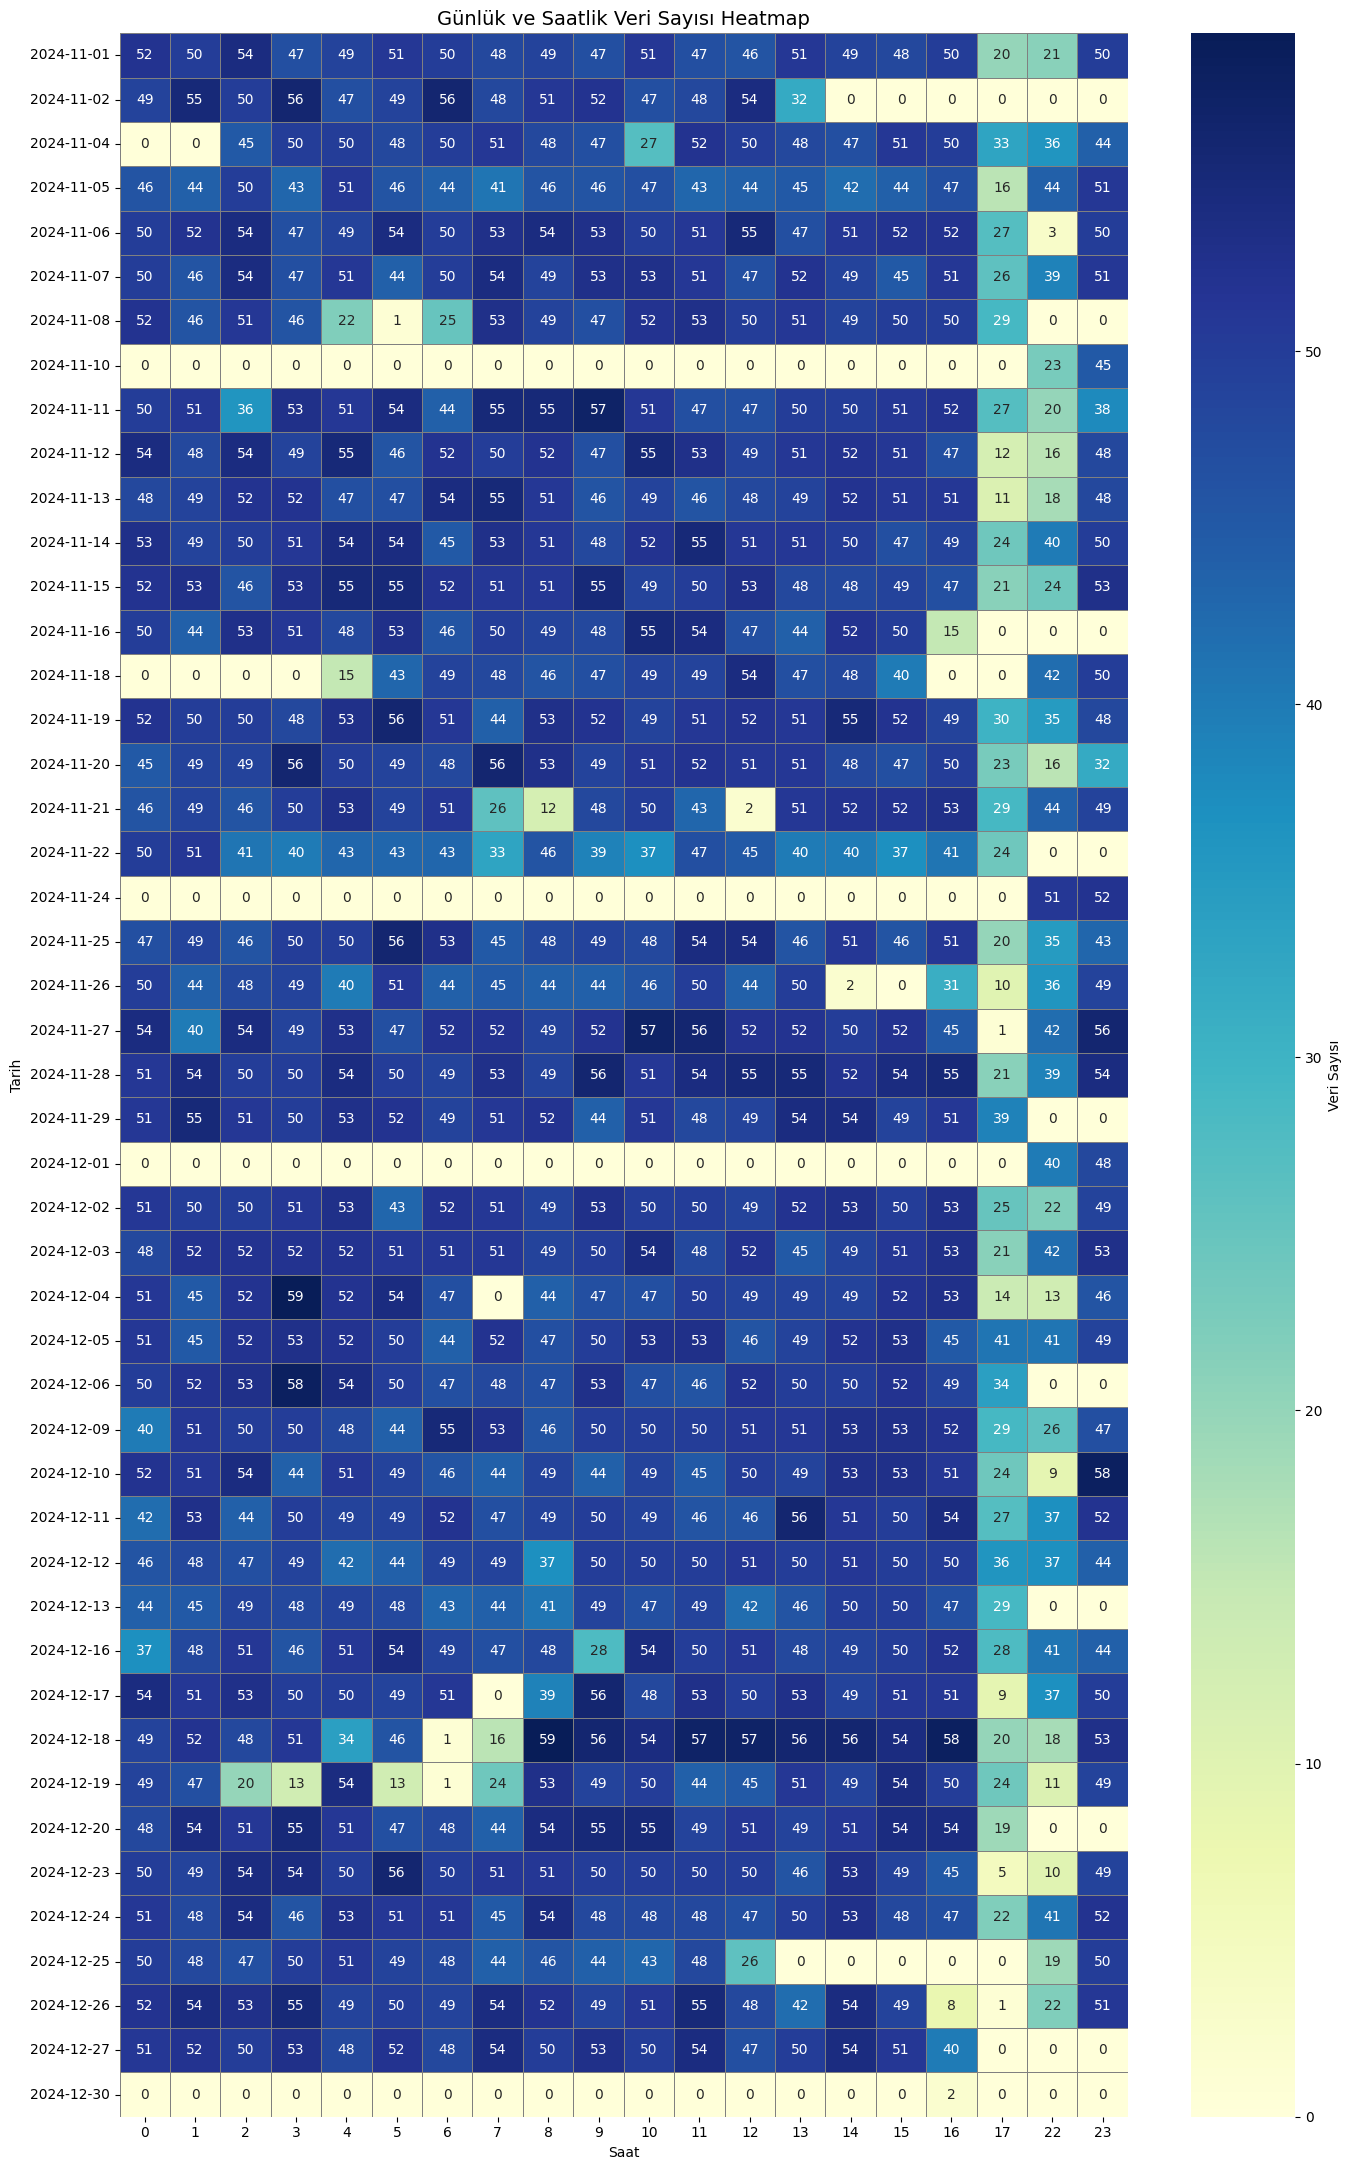

In [16]:
plot_daily_hourly_heatmap(df,datetime_column="datetime")

In [17]:
from datetime import datetime, timedelta
import pandas as pd

def eksik_zaman_araliklarini_bul(df):
    df["datetime"] = pd.to_datetime(df["tarih"].astype(str) + " " + df["saat"].astype(str), errors="coerce")
    
    full_days = pd.date_range(
        start=df["datetime"].min().normalize(),
        end=df["datetime"].max().normalize(),
        freq="D"
    ).date

    missing_ranges_per_day = {}
    eksik_dakika_istatistik = {}

    for date in full_days:
        daily_df = df[df["datetime"].dt.date == date]
        if daily_df.empty:
            missing_ranges_per_day[date] = [("Tüm gün", "veri yok")]
            eksik_dakika_istatistik[date] = 1440
            continue

        mevcut_saatler = daily_df["datetime"].dt.strftime("%H:%M")
        full_range = pd.date_range(
            start=datetime.combine(date, datetime.min.time()),
            end=datetime.combine(date, datetime.max.time()),
            freq="T"
        ).strftime("%H:%M")

        missing_minutes = sorted(set(full_range) - set(mevcut_saatler))

        if missing_minutes:
            ranges = []
            start = missing_minutes[0]
            for i in range(1, len(missing_minutes)):
                prev = datetime.strptime(missing_minutes[i - 1], "%H:%M")
                curr = datetime.strptime(missing_minutes[i], "%H:%M")
                if (curr - prev) != timedelta(minutes=1):
                    end = missing_minutes[i - 1]
                    ranges.append((start, end))
                    start = missing_minutes[i]
            ranges.append((start, missing_minutes[-1]))
            missing_ranges_per_day[date] = ranges

            toplam_eksik = sum((datetime.strptime(end, "%H:%M") - datetime.strptime(start, "%H:%M")).seconds // 60 + 1
                               for start, end in ranges)
            eksik_dakika_istatistik[date] = toplam_eksik
        else:
            eksik_dakika_istatistik[date] = 0

    for date in full_days:
        print(f"{date} tarihinde eksik zaman aralıkları:")
        for r in missing_ranges_per_day.get(date, []):
            if r == ("Tüm gün", "veri yok"):
                print(f" - Tüm gün veri yok")
            elif r[0] == r[1]:
                print(f" - {r[0]} eksik")
            else:
                print(f" - {r[0]} ile {r[1]} arası eksik")
        print(f"Toplam eksik dakika: {eksik_dakika_istatistik.get(date, 0)} dk\n")

    return missing_ranges_per_day, eksik_dakika_istatistik


In [18]:
# Veride eksik dakikaları ve tamamen boş günleri tespit ettim
missing_ranges_per_day, eksik_dakikalar = eksik_zaman_araliklarini_bul(df)

C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2932717273.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2932717273.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2932717273.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2932717273.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2932717273.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\

2024-11-01 tarihinde eksik zaman aralıkları:
 - 00:01 ile 00:02 arası eksik
 - 00:05 eksik
 - 00:07 eksik
 - 00:11 eksik
 - 00:42 eksik
 - 00:51 eksik
 - 00:55 eksik
 - 01:20 eksik
 - 01:22 eksik
 - 01:26 eksik
 - 01:30 eksik
 - 01:35 eksik
 - 01:41 eksik
 - 01:45 eksik
 - 01:51 eksik
 - 01:56 eksik
 - 01:59 eksik
 - 02:03 eksik
 - 02:16 eksik
 - 02:22 eksik
 - 02:28 eksik
 - 02:52 ile 02:53 arası eksik
 - 03:02 eksik
 - 03:07 ile 03:08 arası eksik
 - 03:11 eksik
 - 03:17 eksik
 - 03:22 eksik
 - 03:31 eksik
 - 03:35 ile 03:36 arası eksik
 - 03:42 ile 03:43 arası eksik
 - 03:48 eksik
 - 03:52 eksik
 - 04:00 eksik
 - 04:06 eksik
 - 04:08 eksik
 - 04:13 eksik
 - 04:19 eksik
 - 04:28 eksik
 - 04:30 eksik
 - 04:36 eksik
 - 04:49 eksik
 - 04:52 eksik
 - 04:55 eksik
 - 05:01 eksik
 - 05:03 eksik
 - 05:11 ile 05:12 arası eksik
 - 05:16 eksik
 - 05:42 eksik
 - 05:47 eksik
 - 05:57 eksik
 - 05:59 ile 06:00 arası eksik
 - 06:03 eksik
 - 06:05 eksik
 - 06:08 eksik
 - 06:11 eksik
 - 06:14 eksik
 - 

C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2932717273.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(


### Günler 

In [19]:
df.head()

,tarih,saat_dakika,saat,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,...,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,datetime
0,2024-11-01,00:00,00:00:00,1,1081,550,518,75,650,680,...,850,16,222,656,515,363,3150,2750,0,2024-11-01 00:00:00
1,2024-11-01,00:03,00:03:00,1,1013,550,517,75,649,680,...,840,56,393,659,522,368,3150,2750,0,2024-11-01 00:03:00
2,2024-11-01,00:04,00:04:00,1,1178,550,517,75,644,680,...,846,67,520,660,524,370,3150,2750,0,2024-11-01 00:04:00
3,2024-11-01,00:06,00:06:00,1,1075,550,519,75,642,680,...,850,11,192,664,529,373,3150,2750,0,2024-11-01 00:06:00
4,2024-11-01,00:08,00:08:00,1,1166,550,519,75,649,680,...,840,30,252,666,532,377,3150,2750,0,2024-11-01 00:08:00


In [20]:
import pandas as pd

# 2. Çıkarılacak hafta sonu tarihleri
haftasonlari = [
    "2024-11-02", "2024-11-03", "2024-11-09", "2024-11-10",
    "2024-11-16", "2024-11-17", "2024-11-23", "2024-11-24",
    "2024-11-30", "2024-12-01", "2024-12-07", "2024-12-08",
    "2024-12-14", "2024-12-15", "2024-12-21", "2024-12-22",
    "2024-12-28", "2024-12-29", "2024-12-30"
]

# 3. Listeyi datetime'a çevir
haftasonlari = pd.to_datetime(haftasonlari)

# 4. Bu tarihleri çıkar
df_no_weekends = df[~df["tarih"].isin(haftasonlari)].copy()

# Kontrol
print(f"Orijinal veri: {len(df)} satır")
print(f"Hafta sonları çıkarıldıktan sonra: {len(df_no_weekends)} satır")


Orijinal veri: 38472 satır
Hafta sonları çıkarıldıktan sonra: 36708 satır


In [21]:
df.shape

(38472, 60)

In [22]:
df_no_weekends.shape

(36708, 60)

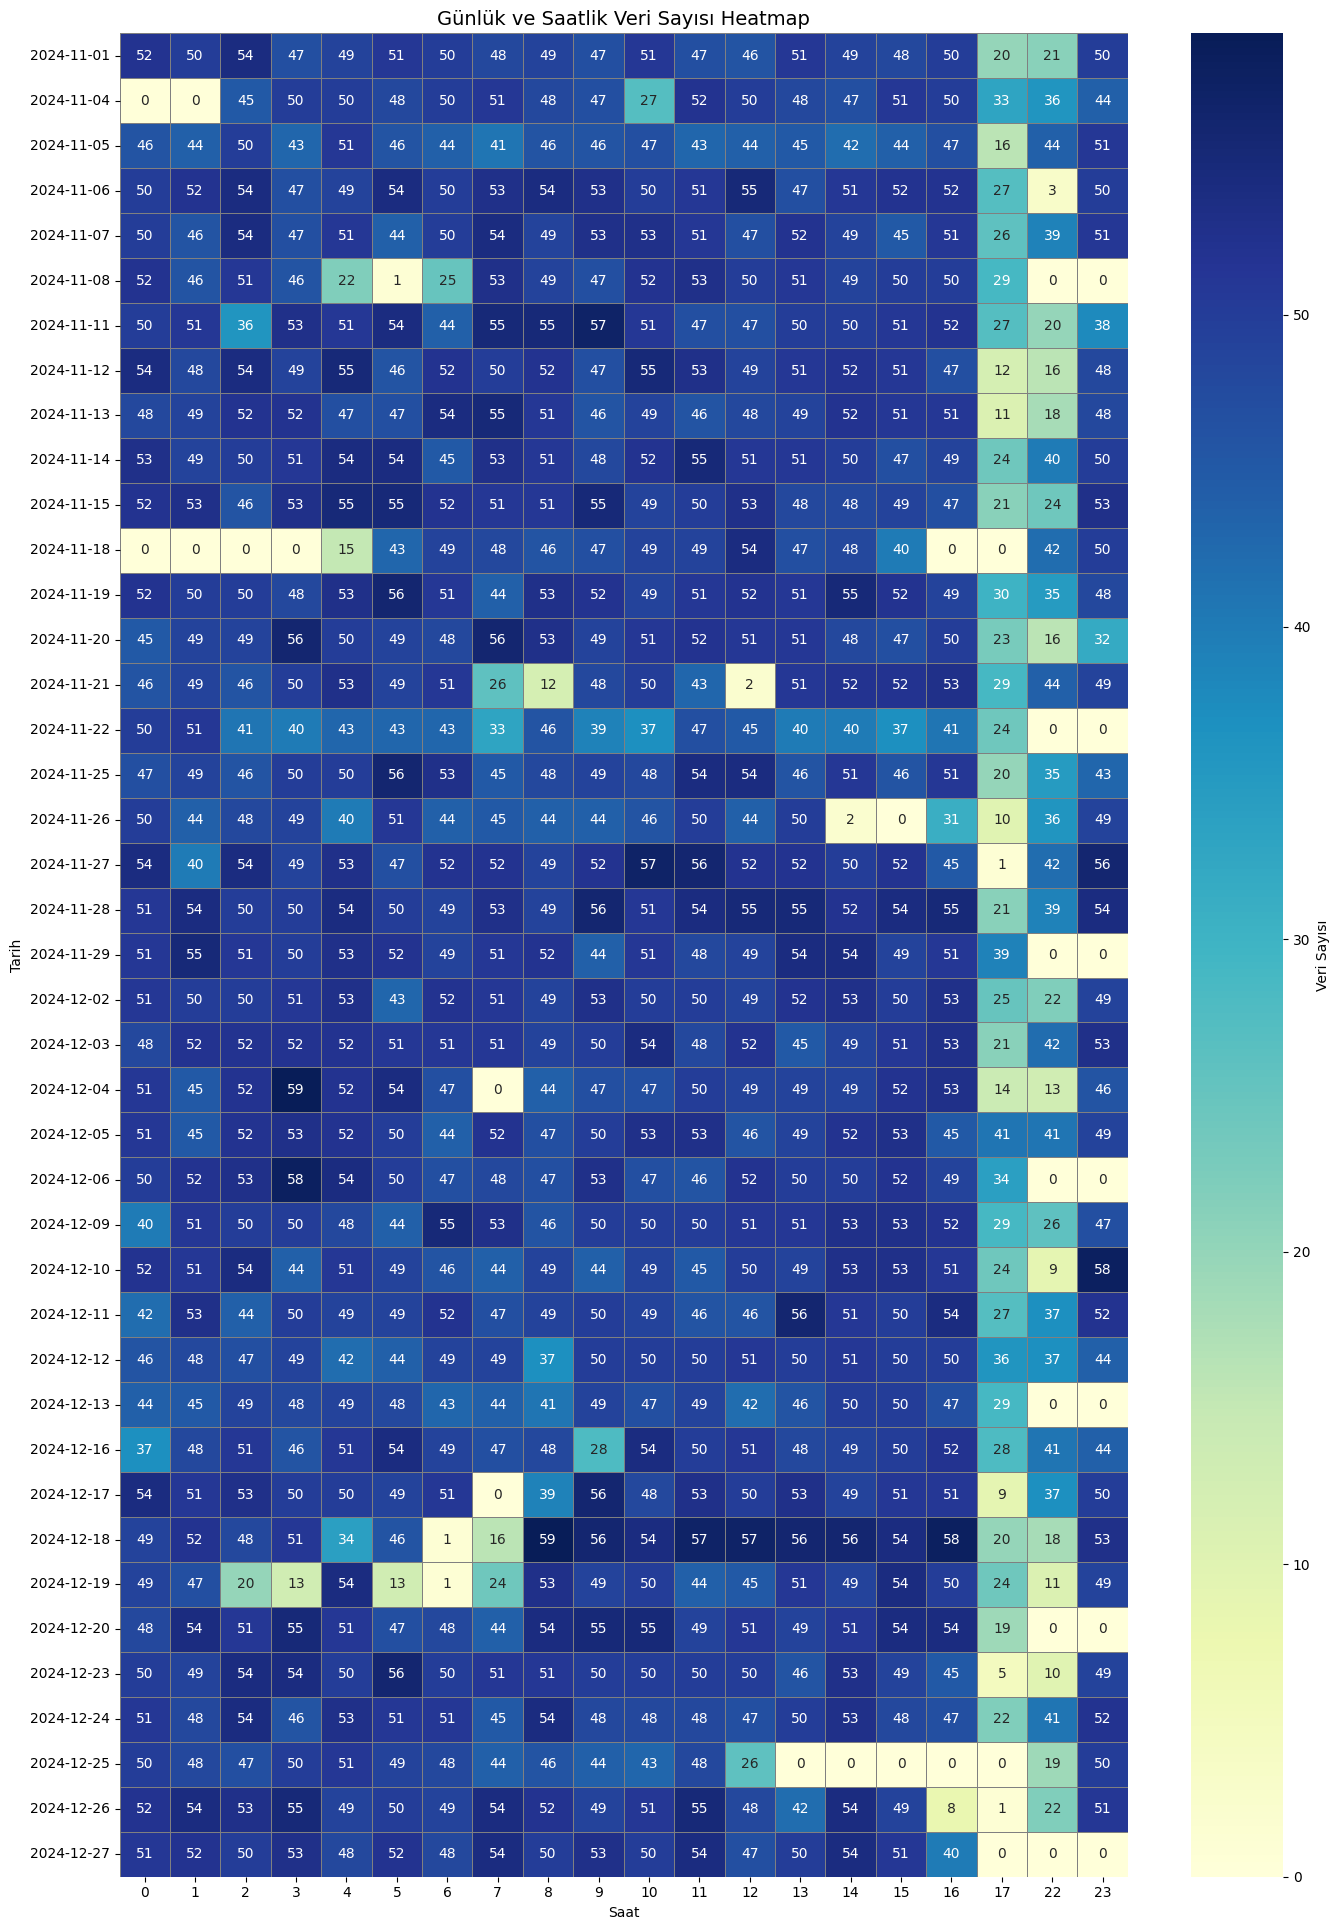

In [23]:
plot_daily_hourly_heatmap(df_no_weekends, datetime_column="datetime")

### Saat ve dakikalar

In [24]:
# Veriyi sadece belirli saat aralığında tutmak (örneğin 08:00 – 16:59)

def filtrele_saat_araligi(df, baslangic_saat=8, bitis_saat=17):
    df = df.copy()
    df['Saat'] = df['datetime'].dt.hour
    df = df[(df['Saat'] >= baslangic_saat) & (df['Saat'] < bitis_saat)]
    return df

df_temiz = filtrele_saat_araligi(df_no_weekends)

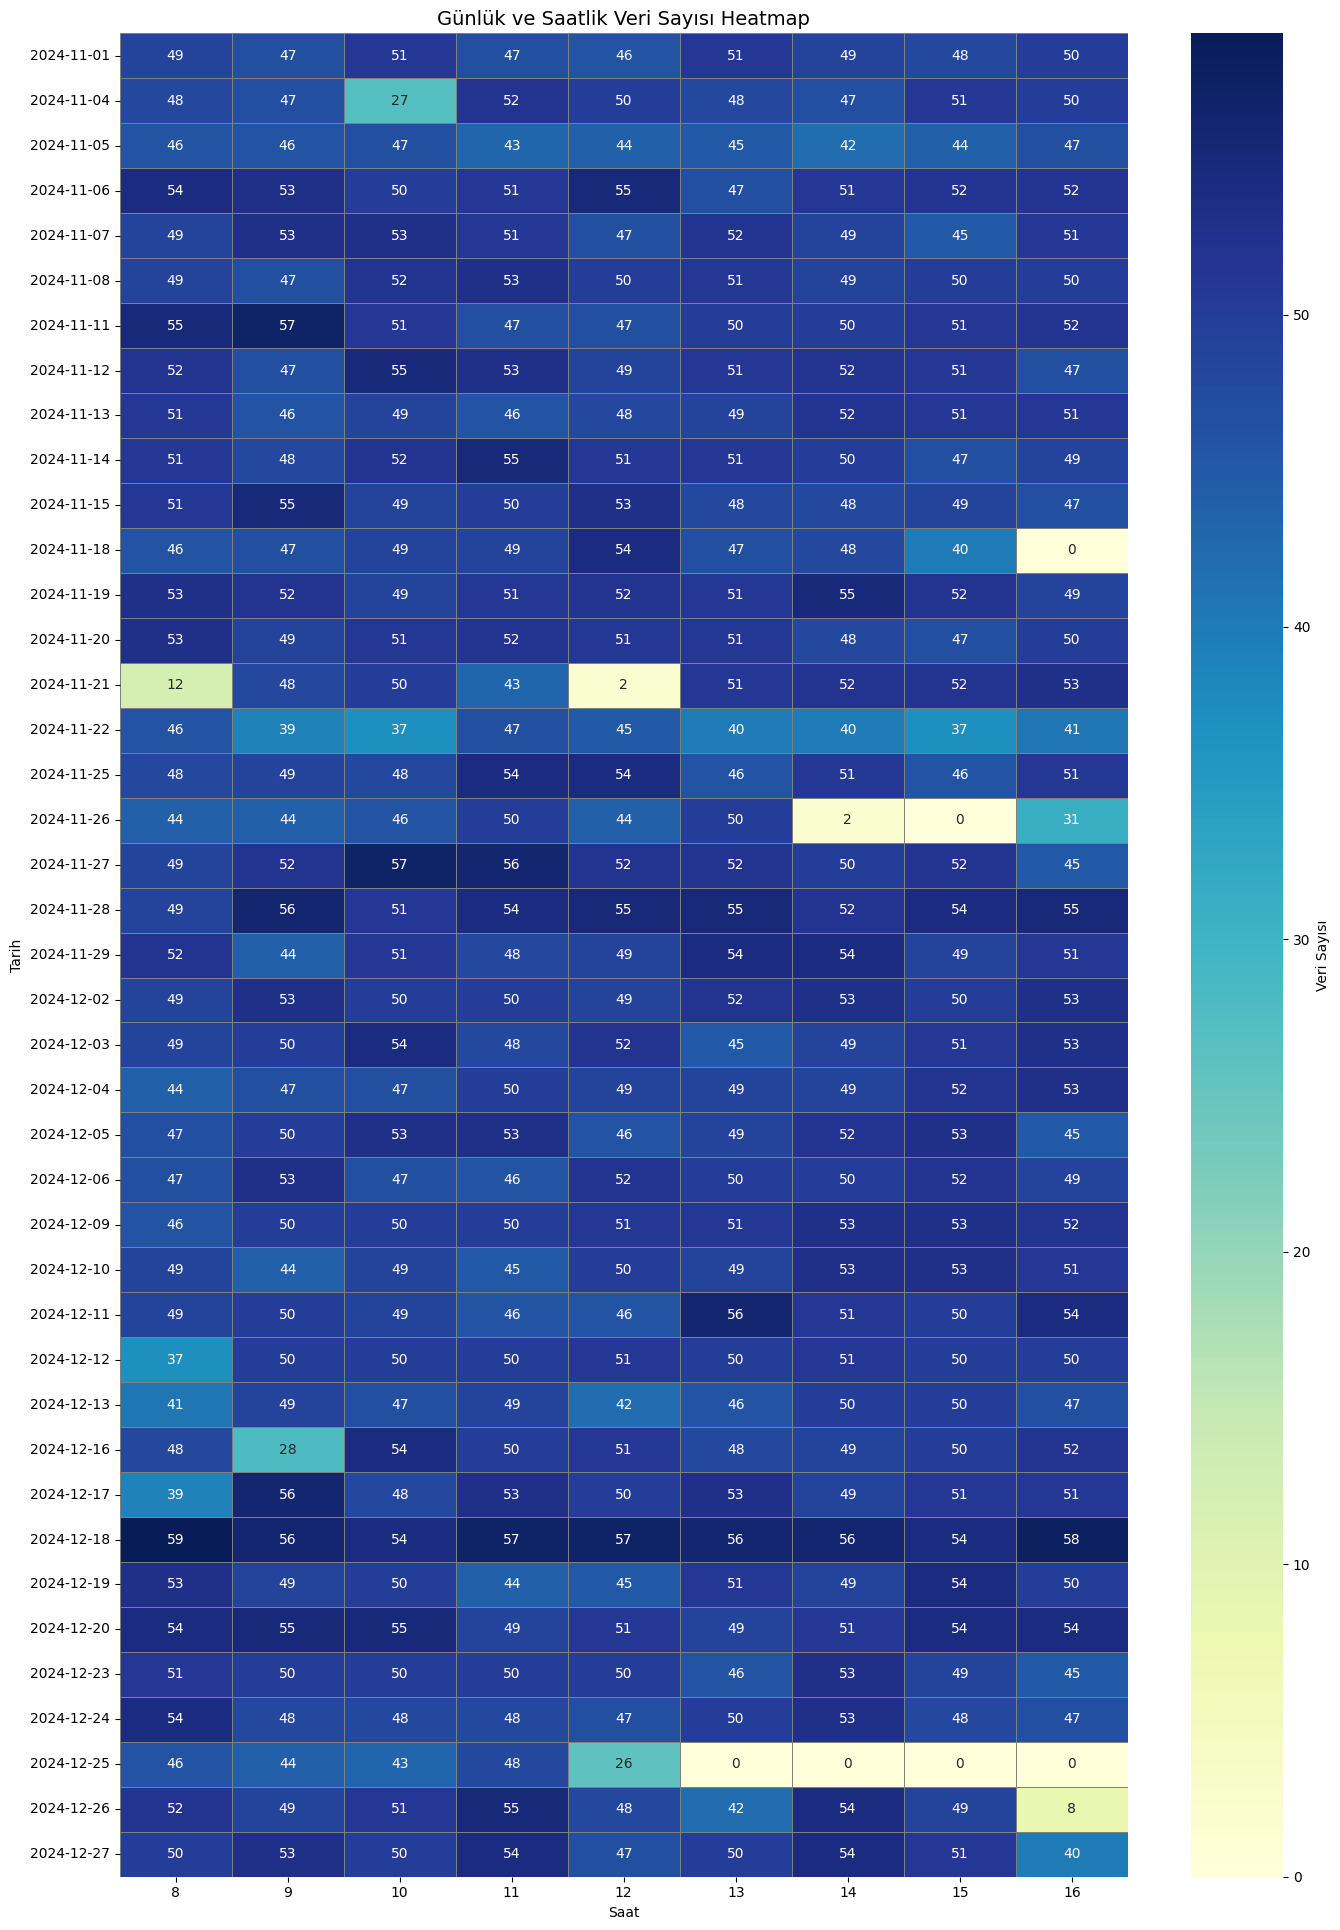

In [25]:
plot_daily_hourly_heatmap(df_temiz, datetime_column="datetime")

In [26]:
df_temiz.head()

,tarih,saat_dakika,saat,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,...,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,datetime,Saat
401,2024-11-01,08:00,08:00:00,1,337,550,549,75,647,680,...,36,305,738,636,504,3250,2750,0,2024-11-01 08:00:00,8
402,2024-11-01,08:01,08:01:00,1,343,550,547,75,641,680,...,39,336,740,639,505,3250,2750,0,2024-11-01 08:01:00,8
403,2024-11-01,08:02,08:02:00,1,336,550,551,74,638,680,...,25,266,738,636,505,3250,2750,0,2024-11-01 08:02:00,8
404,2024-11-01,08:03,08:03:00,1,329,550,547,75,645,680,...,10,149,740,639,505,3250,2750,0,2024-11-01 08:03:00,8
405,2024-11-01,08:04,08:04:00,1,345,550,552,69,495,680,...,10,148,737,636,504,3250,2750,0,2024-11-01 08:04:00,8


In [27]:
df_temiz.shape

(17788, 61)

In [28]:
df_filtered = df_temiz

In [29]:
df_filtered.shape

(17788, 61)

In [30]:
df_filtered.head(3)

,tarih,saat_dakika,saat,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,...,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,datetime,Saat
401,2024-11-01,08:00,08:00:00,1,337,550,549,75,647,680,...,36,305,738,636,504,3250,2750,0,2024-11-01 08:00:00,8
402,2024-11-01,08:01,08:01:00,1,343,550,547,75,641,680,...,39,336,740,639,505,3250,2750,0,2024-11-01 08:01:00,8
403,2024-11-01,08:02,08:02:00,1,336,550,551,74,638,680,...,25,266,738,636,505,3250,2750,0,2024-11-01 08:02:00,8


In [31]:
df_temiz["saat"]

401      08:00:00
402      08:01:00
403      08:02:00
404      08:03:00
405      08:04:00
           ...   
38465    16:43:04
38466    16:44:04
38467    16:45:04
38468    16:46:04
38469    16:50:04
Name: saat, Length: 17788, dtype: object

## Dakikalık Veri Tamamlama

In [32]:
import pandas as pd

# 1. df_temiz'in datetime sütunundan sadece tarihleri al
gunler = df_temiz['datetime'].dt.date.unique()

# 2. Her gün için saat 08:00 ile 16:59 arasında dakikalık zaman aralıkları üret
zaman_araliklari = []
for gun in gunler:
    baslangic = pd.to_datetime(f"{gun} 08:00:00")
    bitis = pd.to_datetime(f"{gun} 16:59:00")
    aralik = pd.date_range(start=baslangic, end=bitis, freq='T')  # T = minute
    zaman_araliklari.extend(aralik)

# 3. Yeni datetime sütunu ile eksiksiz zamanları içeren dataframe oluştur
df_tam_zaman = pd.DataFrame({'datetime': zaman_araliklari})

# 4. df_tam_zaman ile df_temiz'i datetime'a göre dış birleştirme (outer join)
df_eksik_tamamlanmis = pd.merge(df_tam_zaman, df_temiz, on='datetime', how='left')

# Sonuç: df_eksik_tamamlanmis artık tüm dakikaları içeriyor, eksik satırlarda NaN olacak


C:\Users\havva\AppData\Local\Temp\ipykernel_2404\2636075469.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  aralik = pd.date_range(start=baslangic, end=bitis, freq='T')  # T = minute


In [33]:
import pandas as pd

# datetime sütununu dakika hassasiyetine yuvarla (emin olmak için)
df_temiz['datetime'] = pd.to_datetime(df_temiz['datetime']).dt.floor('min')

# 1. Mevcut günleri al
gunler = df_temiz['datetime'].dt.normalize().unique()

# 2. Her gün için 08:00 - 16:59 arası dakikalık zamanlar üret
tüm_zamanlar = []
for gun in gunler:
    baslangic = pd.to_datetime(gun) + pd.Timedelta(hours=8)
    bitis = pd.to_datetime(gun) + pd.Timedelta(hours=16, minutes=59)
    zamanlar = pd.date_range(start=baslangic, end=bitis, freq='T')
    tüm_zamanlar.extend(zamanlar)

# 3. Yeni bir dataframe oluştur, sadece datetime sütunu olsun
df_eksik_zamanlar = pd.DataFrame({'datetime': tüm_zamanlar})

# 4. Şimdi `df_temiz` ile bu yeni dataframe'i `datetime` üzerinden birleştir (left join)
# Orijinal df_temiz değişmeyecek, birleşen yeni bir df dönecek
df_birlesik = pd.merge(df_eksik_zamanlar, df_temiz, on='datetime', how='left')

# Artık df_birlesik tüm dakikaları içeriyor, eksik olanlar NaN


C:\Users\havva\AppData\Local\Temp\ipykernel_2404\770638240.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  zamanlar = pd.date_range(start=baslangic, end=bitis, freq='T')


In [34]:
df_eksik_zamanlar.shape

(22140, 1)

In [35]:
df_birlesik.shape

(22140, 61)

In [36]:
print("Orijinal gün sayısı:", len(gunler))
print("Beklenen maksimum satır:", len(gunler) * 540)
print("Gerçekleşen satır sayısı:", len(df_birlesik))

Orijinal gün sayısı: 41
Beklenen maksimum satır: 22140
Gerçekleşen satır sayısı: 22140


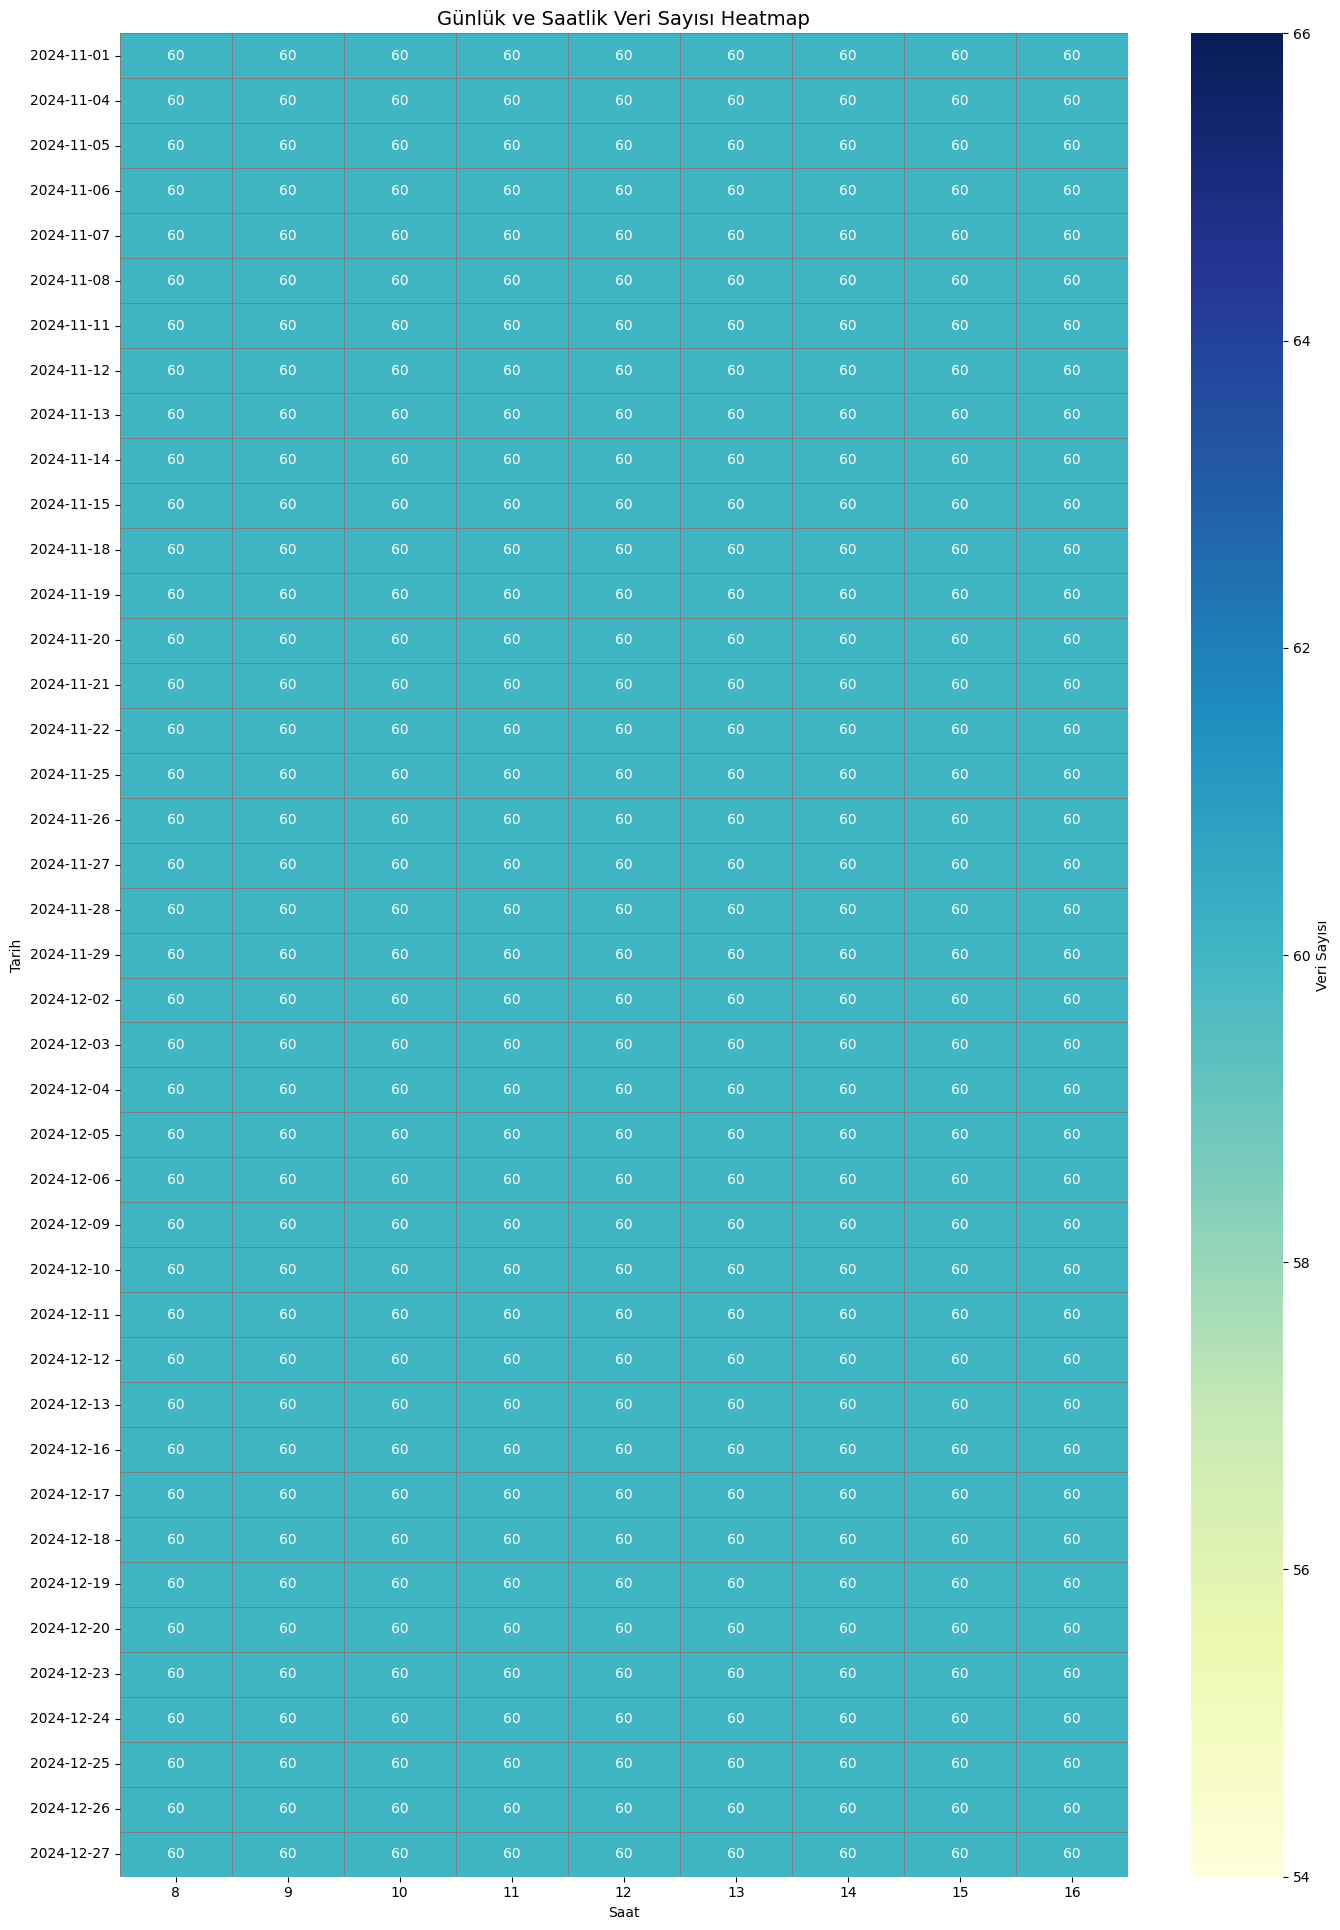

In [37]:
plot_daily_hourly_heatmap(df_birlesik, datetime_column="datetime")

In [38]:
df_eksik_zamanlar.isnull().sum()     #  yalnızca mevcut günler için, her biri için 08:00 - 16:59 saat aralığında olacak şekilde dakikalık aralıklarla oluşturulmuş bir datetime sütununa sahip dataframe'dir.

datetime    0
dtype: int64

Gerçek Veri ile Birleştirme:

- Orijinal veri (df_temiz) ile bu eksiksiz zaman tablosu datetime üzerinden birleştirilir.
- Mevcut veriler yerini bulur, olmayan zamanlara NaN yazılır.

In [39]:
df_temiz.isnull().sum() 

tarih               0
saat_dakika         0
saat                0
prg                 0
giris_isi           0
                   ..
rulo_frekans_hz     0
giris_per.fan_hz    0
cikis_per.fan_hz    0
datetime            0
Saat                0
Length: 61, dtype: int64

In [40]:
df_birlesik.isnull().sum()                             

datetime               0
tarih               4352
saat_dakika         4352
saat                4352
prg                 4352
                    ... 
sogutma3_isi        4352
rulo_frekans_hz     4352
giris_per.fan_hz    4352
cikis_per.fan_hz    4352
Saat                4352
Length: 61, dtype: int64

In [41]:
df_birlesik.head()

,datetime,tarih,saat_dakika,saat,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,...,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,Saat
0,2024-11-01 08:00:00,2024-11-01,08:00,08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,...,838.0,36.0,305.0,738.0,636.0,504.0,3250.0,2750.0,0.0,8.0
1,2024-11-01 08:01:00,2024-11-01,08:01,08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,...,841.0,39.0,336.0,740.0,639.0,505.0,3250.0,2750.0,0.0,8.0
2,2024-11-01 08:02:00,2024-11-01,08:02,08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,...,843.0,25.0,266.0,738.0,636.0,505.0,3250.0,2750.0,0.0,8.0
3,2024-11-01 08:03:00,2024-11-01,08:03,08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,...,843.0,10.0,149.0,740.0,639.0,505.0,3250.0,2750.0,0.0,8.0
4,2024-11-01 08:04:00,2024-11-01,08:04,08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,...,840.0,10.0,148.0,737.0,636.0,504.0,3250.0,2750.0,0.0,8.0


In [42]:
# Sadece sütunları kaldırmak için
df_yeni = df_birlesik.drop(columns=['saat_dakika', 'Saat', 'tarih', 'saat'], errors='ignore')

In [43]:
df_yeni.head(2)

,datetime,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,...,ceh.3_alt2_set_isi,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz
0,2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,...,840.0,838.0,36.0,305.0,738.0,636.0,504.0,3250.0,2750.0,0.0
1,2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,...,840.0,841.0,39.0,336.0,740.0,639.0,505.0,3250.0,2750.0,0.0


In [44]:
df_yeni.shape

(22140, 57)

In [45]:
df_yeni.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

In [46]:
for col in df_yeni.columns:
    if col != 'datetime':
        unique_vals = df_yeni[col].dropna().nunique()
        print(f"{col}: {unique_vals} farklı değer")

prg: 1 farklı değer
giris_isi: 714 farklı değer
on_isitma_set_isi: 4 farklı değer
on_isitma_isi: 190 farklı değer
on_isitma_guc_%: 67 farklı değer
on_isitma_amp.: 628 farklı değer
ceh.1_ust1_set_isi: 1 farklı değer
ceh.1_ust1_isi: 199 farklı değer
ceh.1_ust1_guc_%: 62 farklı değer
ceh.1_ust1_amp.: 414 farklı değer
ceh.1_ust2_set_isi: 3 farklı değer
ceh.1_ust2__isi: 220 farklı değer
ceh.1_ust2_guc_%: 63 farklı değer
ceh.1_ust2_amp.: 469 farklı değer
ceh.1_alt1_set_isi: 3 farklı değer
ceh.1_alt1_isi: 218 farklı değer
ceh.1_alt1_guc_%: 67 farklı değer
ceh.1_alt1_amp.: 567 farklı değer
ceh.2_ust1_set_isi: 11 farklı değer
ceh.2_ust1_isi: 231 farklı değer
ceh.2_ust1_guc_%: 66 farklı değer
ceh.2_ust1_amp.: 460 farklı değer
ceh.2_ust2_set_isi: 11 farklı değer
ceh.2_ust2_isi: 236 farklı değer
ceh.2_ust2_guc_%: 62 farklı değer
ceh.2_ust2_amp.: 433 farklı değer
ceh.2_alt1_set_isi: 11 farklı değer
ceh.2_alt1_isi: 237 farklı değer
ceh.2_alt1_guc_%: 62 farklı değer
ceh.2_alt1_amp.: 500 farklı değer


In [47]:
df_yeni.isnull().sum()      

datetime                 0
prg                   4352
giris_isi             4352
on_isitma_set_isi     4352
on_isitma_isi         4352
on_isitma_guc_%       4352
on_isitma_amp.        4352
ceh.1_ust1_set_isi    4352
ceh.1_ust1_isi        4352
ceh.1_ust1_guc_%      4352
ceh.1_ust1_amp.       4352
ceh.1_ust2_set_isi    4352
ceh.1_ust2__isi       4352
ceh.1_ust2_guc_%      4352
ceh.1_ust2_amp.       4352
ceh.1_alt1_set_isi    4352
ceh.1_alt1_isi        4352
ceh.1_alt1_guc_%      4352
ceh.1_alt1_amp.       4352
ceh.2_ust1_set_isi    4352
ceh.2_ust1_isi        4352
ceh.2_ust1_guc_%      4352
ceh.2_ust1_amp.       4352
ceh.2_ust2_set_isi    4352
ceh.2_ust2_isi        4352
ceh.2_ust2_guc_%      4352
ceh.2_ust2_amp.       4352
ceh.2_alt1_set_isi    4352
ceh.2_alt1_isi        4352
ceh.2_alt1_guc_%      4352
ceh.2_alt1_amp.       4352
ceh.2_alt2_set_isi    4352
ceh.2_alt2_isi        4352
ceh.2_alt2_guc_%      4352
ceh.2_alt2_amp.       4352
ceh.3_ust1_set_isi    4352
ceh.3_ust1_isi        4352
c

### Mod (mode) ile doldurma

In [48]:
mod_ile_doldurulacaklar = [
    'prg', 'on_isitma_set_isi', 'ceh.1_ust1_set_isi', 'ceh.1_ust2_set_isi',
    'ceh.1_alt1_set_isi', 'ceh.2_ust1_set_isi', 'ceh.2_ust2_set_isi',
    'ceh.2_alt1_set_isi', 'ceh.2_alt2_set_isi', 'ceh.3_ust1_set_isi',
    'ceh.3_ust2_set_isi', 'ceh.3_alt1_set_isi', 'ceh.3_alt2_set_isi',
    'rulo_frekans_hz', 'giris_per.fan_hz', 'cikis_per.fan_hz',
    'on_isitma_guc_%'
]

# Mod ile doldurma işlemi:
for sutun in mod_ile_doldurulacaklar:
    try:
        mod_deger = df_yeni[sutun].mode(dropna=True)[0]
        df_yeni[sutun].fillna(mod_deger, inplace=True)
    except IndexError:
        print(f"Mod bulunamadı: {sutun}")


C:\Users\havva\AppData\Local\Temp\ipykernel_2404\1803169863.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_yeni[sutun].fillna(mod_deger, inplace=True)


In [49]:
df_yeni.isnull().sum()      

datetime                 0
prg                      0
giris_isi             4352
on_isitma_set_isi        0
on_isitma_isi         4352
on_isitma_guc_%          0
on_isitma_amp.        4352
ceh.1_ust1_set_isi       0
ceh.1_ust1_isi        4352
ceh.1_ust1_guc_%      4352
ceh.1_ust1_amp.       4352
ceh.1_ust2_set_isi       0
ceh.1_ust2__isi       4352
ceh.1_ust2_guc_%      4352
ceh.1_ust2_amp.       4352
ceh.1_alt1_set_isi       0
ceh.1_alt1_isi        4352
ceh.1_alt1_guc_%      4352
ceh.1_alt1_amp.       4352
ceh.2_ust1_set_isi       0
ceh.2_ust1_isi        4352
ceh.2_ust1_guc_%      4352
ceh.2_ust1_amp.       4352
ceh.2_ust2_set_isi       0
ceh.2_ust2_isi        4352
ceh.2_ust2_guc_%      4352
ceh.2_ust2_amp.       4352
ceh.2_alt1_set_isi       0
ceh.2_alt1_isi        4352
ceh.2_alt1_guc_%      4352
ceh.2_alt1_amp.       4352
ceh.2_alt2_set_isi       0
ceh.2_alt2_isi        4352
ceh.2_alt2_guc_%      4352
ceh.2_alt2_amp.       4352
ceh.3_ust1_set_isi       0
ceh.3_ust1_isi        4352
c

In [50]:
df_yeni.shape

(22140, 57)

### Forward Fill (ffill) ile doldurma

In [51]:
df_yeni.fillna(method='ffill', inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_2404\1071543878.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_yeni.fillna(method='ffill', inplace=True)


In [52]:
df_yeni.isnull().sum()      

datetime              0
prg                   0
giris_isi             0
on_isitma_set_isi     0
on_isitma_isi         0
on_isitma_guc_%       0
on_isitma_amp.        0
ceh.1_ust1_set_isi    0
ceh.1_ust1_isi        0
ceh.1_ust1_guc_%      0
ceh.1_ust1_amp.       0
ceh.1_ust2_set_isi    0
ceh.1_ust2__isi       0
ceh.1_ust2_guc_%      0
ceh.1_ust2_amp.       0
ceh.1_alt1_set_isi    0
ceh.1_alt1_isi        0
ceh.1_alt1_guc_%      0
ceh.1_alt1_amp.       0
ceh.2_ust1_set_isi    0
ceh.2_ust1_isi        0
ceh.2_ust1_guc_%      0
ceh.2_ust1_amp.       0
ceh.2_ust2_set_isi    0
ceh.2_ust2_isi        0
ceh.2_ust2_guc_%      0
ceh.2_ust2_amp.       0
ceh.2_alt1_set_isi    0
ceh.2_alt1_isi        0
ceh.2_alt1_guc_%      0
ceh.2_alt1_amp.       0
ceh.2_alt2_set_isi    0
ceh.2_alt2_isi        0
ceh.2_alt2_guc_%      0
ceh.2_alt2_amp.       0
ceh.3_ust1_set_isi    0
ceh.3_ust1_isi        0
ceh.3_ust1_guc_%      0
ceh.3_ust1_amp.       0
ceh.3_ust2_set_isi    0
ceh.3_ust2_isi        0
ceh.3_ust2_guc_%

In [53]:
for col in df_yeni.columns:
    if col != 'datetime':
        unique_vals = df_yeni[col].dropna().nunique()
        print(f"{col}: {unique_vals} farklı değer")

prg: 1 farklı değer
giris_isi: 714 farklı değer
on_isitma_set_isi: 4 farklı değer
on_isitma_isi: 190 farklı değer
on_isitma_guc_%: 67 farklı değer
on_isitma_amp.: 628 farklı değer
ceh.1_ust1_set_isi: 1 farklı değer
ceh.1_ust1_isi: 199 farklı değer
ceh.1_ust1_guc_%: 62 farklı değer
ceh.1_ust1_amp.: 414 farklı değer
ceh.1_ust2_set_isi: 3 farklı değer
ceh.1_ust2__isi: 220 farklı değer
ceh.1_ust2_guc_%: 63 farklı değer
ceh.1_ust2_amp.: 469 farklı değer
ceh.1_alt1_set_isi: 3 farklı değer
ceh.1_alt1_isi: 218 farklı değer
ceh.1_alt1_guc_%: 67 farklı değer
ceh.1_alt1_amp.: 567 farklı değer
ceh.2_ust1_set_isi: 11 farklı değer
ceh.2_ust1_isi: 231 farklı değer
ceh.2_ust1_guc_%: 66 farklı değer
ceh.2_ust1_amp.: 460 farklı değer
ceh.2_ust2_set_isi: 11 farklı değer
ceh.2_ust2_isi: 236 farklı değer
ceh.2_ust2_guc_%: 62 farklı değer
ceh.2_ust2_amp.: 433 farklı değer
ceh.2_alt1_set_isi: 11 farklı değer
ceh.2_alt1_isi: 237 farklı değer
ceh.2_alt1_guc_%: 62 farklı değer
ceh.2_alt1_amp.: 500 farklı değer


In [54]:
df_yeni.head()

,datetime,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,...,ceh.3_alt2_set_isi,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz
0,2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,...,840.0,838.0,36.0,305.0,738.0,636.0,504.0,3250.0,2750.0,0.0
1,2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,...,840.0,841.0,39.0,336.0,740.0,639.0,505.0,3250.0,2750.0,0.0
2,2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,...,840.0,843.0,25.0,266.0,738.0,636.0,505.0,3250.0,2750.0,0.0
3,2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,...,840.0,843.0,10.0,149.0,740.0,639.0,505.0,3250.0,2750.0,0.0
4,2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,...,840.0,840.0,10.0,148.0,737.0,636.0,504.0,3250.0,2750.0,0.0


In [55]:
df_yeni.to_csv("yeni_veri/firin_verileri_temizlenmis.csv", index=False)